<a href="https://colab.research.google.com/github/RiyaGupta-prog/Task-3/blob/main/Task%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing** **Price** **Prediction** **using** **Linear** **Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Step** **2**: **Load** **and** **Preview** **Data**


In [ ]:
df = pd.read_csv("Housing.csv")
print(df.head())

      price  area  bedrooms  ...  parking  prefarea furnishingstatus
0  13300000  7420         4  ...        2       yes        furnished
1  12250000  8960         4  ...        3        no        furnished
2  12250000  9960         3  ...        2       yes   semi-furnished
3  12215000  7500         4  ...        3       yes        furnished
4  11410000  7420         4  ...        2        no        furnished

[5 rows x 13 columns]


# **Step** **3**: **Data** **Preprocessing**

In [ ]:
# Convert 'yes'/'no' to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# One-hot encode 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Check for missing values
print(df.isnull().sum())

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


# **Step** **4**: **Define** **Features** and **Target**

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

# **Step** **5**: **Train**/**Test** **split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step** **6**: **Train** **linear** **regression** **model**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Step** **7**: **Evaluate** **Model**

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Absolute Error: 970043.4039201637
Mean Squared Error: 1754318687330.6633
R² Score: 0.6529242642153185


# **Step** **8**: **Coefficient** **Interpretation**

In [ ]:
coefficients = pd.DataFrame({
"Feature": X.columns,
"Coefficient": model.coef_
 })
print(coefficients)


                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                          mainroad  3.679199e+05
5                         guestroom  2.316100e+05
6                          basement  3.902512e+05
7                   hotwaterheating  6.846499e+05
8                   airconditioning  7.914267e+05
9                           parking  2.248419e+05
10                         prefarea  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05


# **Step** **9**: **Plotting** **Simple** **Linear** **Regression**

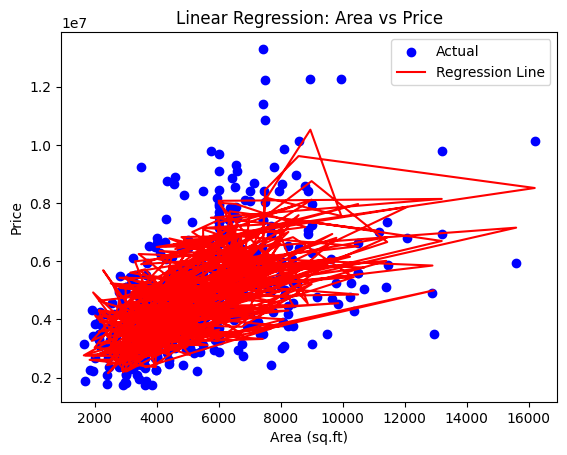

In [ ]:
plt.scatter(df['area'], df['price'], color='blue', label='Actual')
plt.plot(df['area'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Area (sq.ft)')
plt.ylabel('Price')
plt.title('Linear Regression: Area vs Price')
plt.legend()
plt.show()